In [2]:
pip install tensorflow

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [3]:
import tensorflow as tf
mnist=tf.keras.datasets.mnist

In [4]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

In [5]:
x_train.shape

(60000, 28, 28)

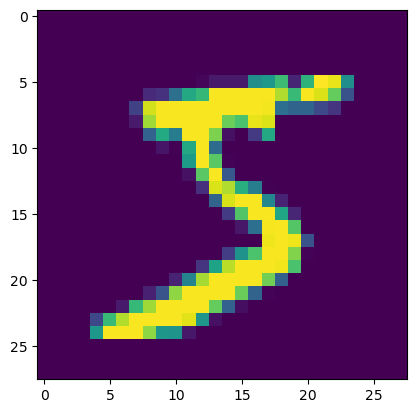

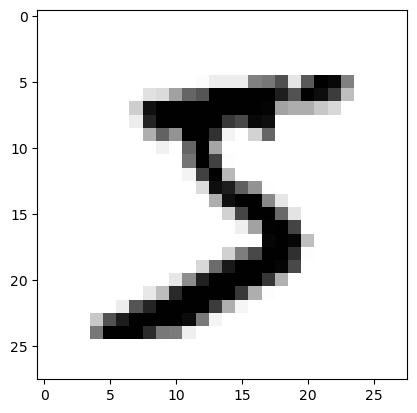

In [6]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0])
plt.show()
plt.imshow(x_train[0],cmap=plt.cm.binary)

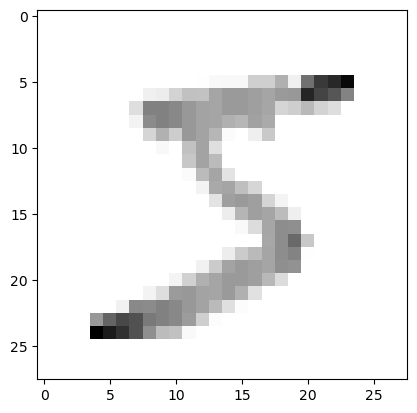

In [7]:
x_train=tf.keras.utils.normalize(x_train,axis=1)
x_test=tf.keras.utils.normalize(x_test,axis=1)
plt.imshow(x_train[0],cmap=plt.cm.binary)

In [8]:
import numpy as np
IMG_SIZE=28
x_trainr=np.array(x_train).reshape(-1,IMG_SIZE,IMG_SIZE,1)
x_testr=np.array(x_test).reshape(-1,IMG_SIZE,IMG_SIZE,1)
print("Training samples dimension",x_trainr.shape)
print("Testing samples dimension",x_testr.shape)

Training samples dimension (60000, 28, 28, 1)
Testing samples dimension (10000, 28, 28, 1)


In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten,Conv2D,MaxPooling2D

In [10]:
model=Sequential()
model.add(Conv2D(64,(3,3),input_shape=x_trainr.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(64))
model.add(Activation("relu"))
model.add(Dense(32))
model.add(Activation("relu"))
model.add(Dense(10))
model.add(Activation("softmax"))

C:\Users\dutta\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [11]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 64)          │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 26, 26, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 11, 11, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 3, 3, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_2 (Activation)            │ (None, 3, 3, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 1, 1, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_3 (Activation)            │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_4 (Activation)            │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │             330 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_5 (Activation)            │ (None, 10)                  │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 81,066 (316.66 KB)

 Trainable params: 81,066 (316.66 KB)

 Non-trainable params: 0 (0.00 B)

In [12]:
model.compile(loss="sparse_categorical_crossentropy",optimizer="adam",metrics=["accuracy"])

In [13]:
model.fit(x_trainr,y_train,epochs=5,validation_split=0.3)

Epoch 1/5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 33s 21ms/step - accuracy: 0.7625 - loss: 0.7209 - val_accuracy: 0.9613 - val_loss: 0.1290
Epoch 2/5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 30s 23ms/step - accuracy: 0.9646 - loss: 0.1174 - val_accuracy: 0.9699 - val_loss: 0.1034
Epoch 3/5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 28s 21ms/step - accuracy: 0.9753 - loss: 0.0809 - val_accuracy: 0.9727 - val_loss: 0.0886
Epoch 4/5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 32s 25ms/step - accuracy: 0.9786 - loss: 0.0685 - val_accuracy: 0.9802 - val_loss: 0.0677
Epoch 5/5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 31s 23ms/step - accuracy: 0.9840 - loss: 0.0509 - val_accuracy: 0.9773 - val_loss: 0.0749


In [14]:
test_loss,test_acc=model.evaluate(x_testr,y_test)
print("test loss",test_loss)
print("Validation accuracy",test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9745 - loss: 0.0771
test loss 0.06640735268592834
Validation accuracy 0.9797999858856201


In [15]:
prediction=model.predict([x_testr])

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step


In [16]:
print(prediction)

[[3.78584929e-07 5.19029300e-06 4.06325489e-05 ... 9.99933958e-01
  1.46515845e-06 1.34738721e-05]
 [5.43088012e-04 7.42779957e-06 9.99356329e-01 ... 1.41285927e-05
  1.43374882e-05 1.36946926e-06]
 [3.27417837e-07 9.99993324e-01 1.68560099e-08 ... 3.45943681e-06
  7.18999161e-07 1.76225214e-07]
 ...
 [1.79498603e-08 5.72690091e-08 4.52351365e-08 ... 1.19228775e-06
  2.16154676e-05 1.67024700e-05]
 [1.62244614e-05 7.31578709e-09 1.48568505e-10 ... 2.36289183e-10
  6.51201699e-05 4.46595868e-06]
 [1.53546993e-04 4.37767267e-06 1.15741750e-04 ... 1.04242886e-07
  6.55856347e-05 2.88491938e-05]]


In [17]:
print(np.argmax(prediction[128]))

8


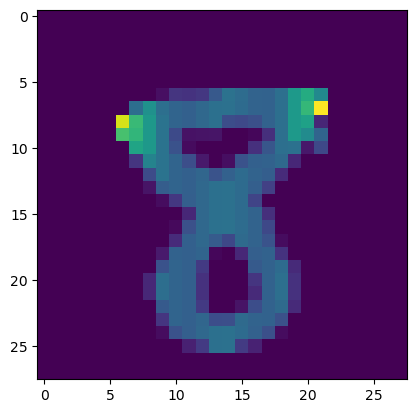

In [18]:
plt.imshow(x_test[128])

In [32]:
!pip install opencv-python
import cv2
print(cv2.__version__)

Defaulting to user installation because normal site-packages is not writeable
4.10.0


In [95]:
img=cv2.imread("sample2.png")

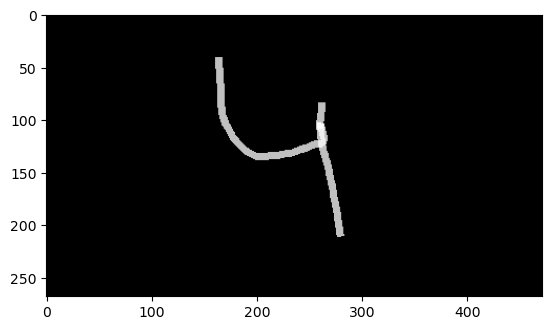

In [96]:
plt.imshow(img)

In [97]:
gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

In [98]:
resized=cv2.resize(gray,(28,28),interpolation=cv2.INTER_AREA)

In [99]:
resized.shape

(28, 28)

In [100]:
newing=tf.keras.utils.normalize(resized,axis=1)

In [101]:
newing=np.array(newing).reshape(-1,IMG_SIZE,IMG_SIZE,1)

In [102]:
newing.shape

(1, 28, 28, 1)

In [103]:
predictions=model.predict(newing)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


In [104]:
print(predictions)

[[2.4889582e-09 2.1858339e-07 2.1590272e-09 8.2905586e-08 9.9997473e-01
  2.5691907e-07 3.9262360e-07 3.7405769e-08 8.1797925e-06 1.6059410e-05]]


In [105]:
print(np.argmax(predictions))

4
